In [2]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt 
import statsmodels
import gdown
import seaborn as sns

In [8]:
df_cry = pd.read_pickle("hourly.pkl")

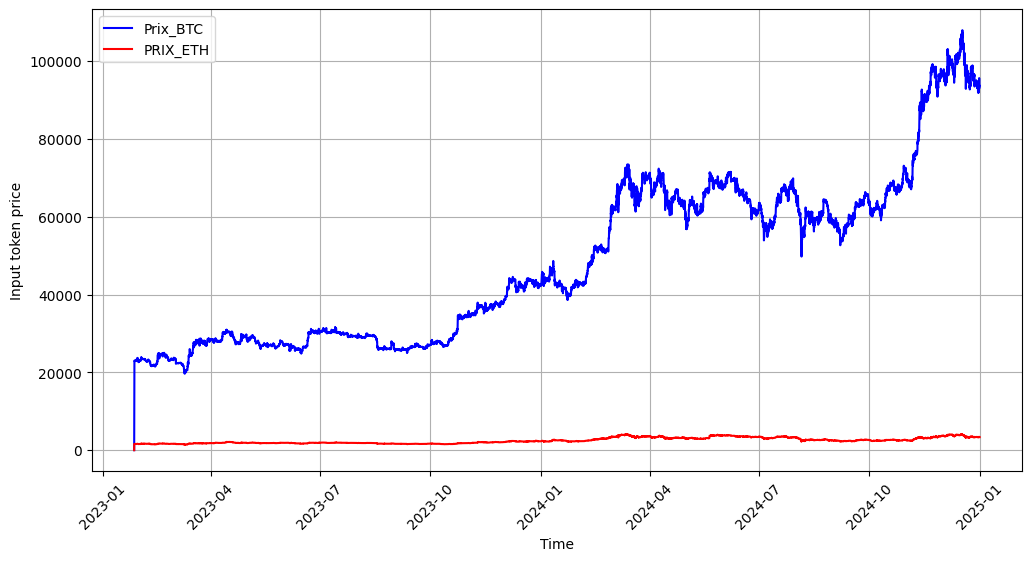

In [9]:
df_BTC=df_cry[df_cry['reserve_name']=='Wrapped BTC']
df_ETH=df_cry[df_cry['reserve_name']== 'Wrapped Ether']
plt.figure(figsize=(12, 6))
plt.plot(df_BTC["datetime"], df_BTC["inputTokenPriceUSD"],color="blue", label="Prix_BTC")
plt.plot(df_ETH["datetime"], df_ETH["inputTokenPriceUSD"], color="red", label="PRIX_ETH")
plt.title=('Evolution of the input token price')
plt.xlabel('Time')
plt.ylabel('Input token price')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [5]:
df_BTC.head()

,Unnamed: 0,blockNumber,timestamp_hours,id,inputTokenPriceUSD,outputTokenPriceUSD,snapshot_timestamp,reserve_name,protocol_name,protocol,datetime
91596,456,16496800,465223,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84719...,0.000000,NaN,1674806207,Wrapped BTC,Aave v3,Aave,2023-01-27 07:00:00+00:00
91575,435,16498211,465228,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84c19...,22901.415798,NaN,1674823235,Wrapped BTC,Aave v3,Aave,2023-01-27 12:00:00+00:00
91570,430,16498545,465229,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84d19...,22889.291609,NaN,1674827267,Wrapped BTC,Aave v3,Aave,2023-01-27 13:00:00+00:00
91566,426,16498670,465230,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84e19...,22840.819903,NaN,1674828779,Wrapped BTC,Aave v3,Aave,2023-01-27 14:00:00+00:00
91556,416,16499116,465231,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84f19...,22979.545483,NaN,1674834143,Wrapped BTC,Aave v3,Aave,2023-01-27 15:00:00+00:00


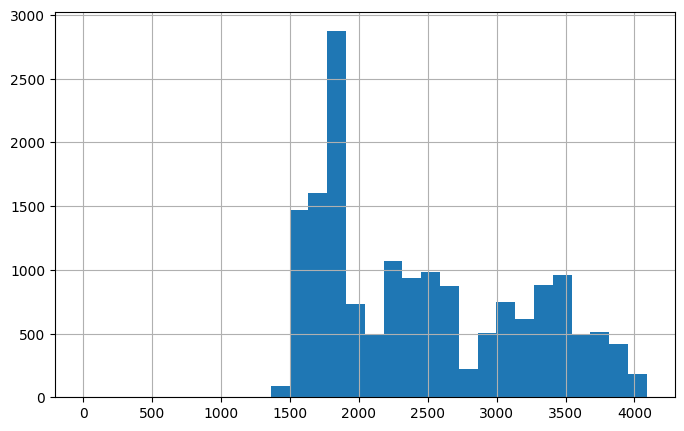

In [10]:
df_ETH['inputTokenPriceUSD'].hist(figsize=(8,5), bins=30)
plt.title=("Distribution des prix ETH")
plt.show()

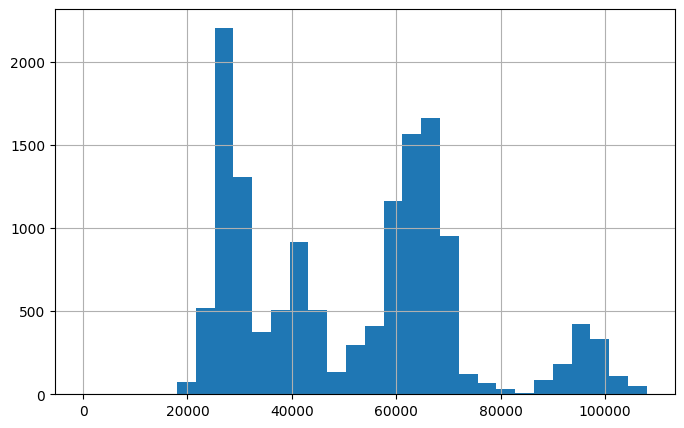

In [51]:
df_BTC['inputTokenPriceUSD'].hist(figsize=(8,5), bins=30)
plt.title=("Distribution des prix BTC")
plt.show()

**Les séries sont non stationnaires**

In [13]:
df_feat= pd.read_pickle("reserve_features.pkl")
df_feat.head()

,Unnamed: 0,regular_datetime,accruedToTreasury,availableLiquidity,averageStableBorrowRate,liquidityIndex,liquidityRate,priceInEth,priceInUsd,stableBorrowRate,...,totalLiquidity,totalPrincipalStableDebt,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,reserve_decimals,reserve_name,reserve_pool,true_value
277128,336,2023-01-27 08:00:00+00:00,1.055897e-07,3.001000,0.0,1.000014,0.000122,1.585870e+11,1.585870e+11,0.068676,...,3.042100,0.0,0.0411,0.013510,1.000017,0.010642,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
277464,672,2023-01-27 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aave Token,NaN,0.0
277016,224,2023-01-27 08:00:00+00:00,0.000000e+00,0.180987,0.0,1.000000,0.000000,0.000000e+00,0.000000e+00,0.075000,...,0.180987,0.0,0.0000,0.000000,1.000000,0.002500,18.0,Wrapped liquid staked Ether 2.0,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
277240,448,2023-01-27 08:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ChainLink Token,NaN,0.0
276792,0,2023-01-27 08:00:00+00:00,0.000000e+00,0.584767,0.0,1.000000,0.000000,1.000158e+08,1.000158e+08,0.050000,...,1.584767,0.0,1.0000,0.631008,1.000000,0.000000,18.0,Dai Stablecoin,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0


In [98]:
res_BTC=df_feat[df_feat['reserve_name']=='Wrapped BTC']
res_ETH=df_feat[df_feat['reserve_name']=='Wrapped Ether']
pd.DataFrame(res_BTC)
pd.DataFrame(res_ETH)

,Unnamed: 0,regular_datetime,accruedToTreasury,availableLiquidity,averageStableBorrowRate,liquidityIndex,liquidityRate,priceInEth,priceInUsd,stableBorrowRate,...,totalLiquidity,totalPrincipalStableDebt,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,reserve_decimals,reserve_name,reserve_pool,true_value
277128,336,2023-01-27 08:00:00+00:00,1.055897e-07,3.001000,0.0,1.000014,0.000122,1.585870e+11,1.585870e+11,0.068676,...,3.042100e+00,0.0,4.110000e-02,0.013510,1.000017,0.010642,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
277129,337,2023-01-27 09:00:00+00:00,1.361124e-07,3.032101,0.0,1.000014,0.002012,1.581139e+11,1.581139e+11,0.075078,...,3.532100e+00,0.0,4.999910e-01,0.141559,1.000018,0.016724,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
277130,338,2023-01-27 10:00:00+00:00,3.003328e-07,29.550121,0.0,1.000015,0.000153,1.576714e+11,1.576714e+11,0.068832,...,3.005012e+01,0.0,4.999910e-01,0.016639,1.000021,0.010790,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
277131,339,2023-01-27 11:00:00+00:00,3.560699e-07,33.550121,0.0,1.000015,0.000134,1.576714e+11,1.576714e+11,0.068734,...,3.405012e+01,0.0,4.999910e-01,0.014684,1.000021,0.010698,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
277132,340,2023-01-27 12:00:00+00:00,1.847959e-06,58.780801,0.0,1.000015,0.004330,1.577070e+11,1.577070e+11,0.079936,...,7.721255e+01,0.0,1.843134e+01,0.238714,1.000023,0.021339,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258187,7435,2024-12-31 19:00:00+00:00,3.796099e+01,248507.187675,0.0,1.037509,0.018703,1.782440e+11,1.782440e+11,0.000000,...,1.709952e+06,0.0,1.405144e+06,0.854670,1.060243,0.025693,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
258188,7436,2024-12-31 20:00:00+00:00,3.860746e+01,248681.290258,0.0,1.037511,0.018700,1.782440e+11,1.782440e+11,0.000000,...,1.710130e+06,0.0,1.405148e+06,0.854583,1.060246,0.025690,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
258189,7437,2024-12-31 21:00:00+00:00,3.922034e+01,248269.077157,0.0,1.037513,0.018709,1.782440e+11,1.782440e+11,0.000000,...,1.709720e+06,0.0,1.405150e+06,0.854790,1.060249,0.025696,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
258190,7438,2024-12-31 22:00:00+00:00,3.988783e+01,251063.592586,0.0,1.037515,0.018649,1.782440e+11,1.782440e+11,0.000000,...,1.712527e+06,0.0,1.405162e+06,0.853396,1.060253,0.025655,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0


In [17]:
df=pd.merge(df_cry, df_feat, left_on='datetime', right_on='regular_datetime')
cols = ['datetime'] + [col for col in df.columns if col != 'datetime']
df= df[cols]
pd.DataFrame(df)


,datetime,Unnamed: 0_x,blockNumber,timestamp_hours,id,inputTokenPriceUSD,outputTokenPriceUSD,snapshot_timestamp,reserve_name_x,protocol_name,...,totalLiquidity,totalPrincipalStableDebt,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,reserve_decimals,reserve_name_y,reserve_pool,true_value
0,2023-01-27 08:00:00+00:00,449,16497086,465224,0x0b925ed163218f6662a35e0f0371ac234f9e93714819...,1751.42278,NaN,1674809651,Wrapped liquid staked Ether 2.0,Aave v3,...,3.042100e+00,0.0,4.110000e-02,0.013510,1.000017,0.010642,18.0,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
1,2023-01-27 08:00:00+00:00,449,16497086,465224,0x0b925ed163218f6662a35e0f0371ac234f9e93714819...,1751.42278,NaN,1674809651,Wrapped liquid staked Ether 2.0,Aave v3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aave Token,NaN,0.0
2,2023-01-27 08:00:00+00:00,449,16497086,465224,0x0b925ed163218f6662a35e0f0371ac234f9e93714819...,1751.42278,NaN,1674809651,Wrapped liquid staked Ether 2.0,Aave v3,...,1.809873e-01,0.0,0.000000e+00,0.000000,1.000000,0.002500,18.0,Wrapped liquid staked Ether 2.0,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
3,2023-01-27 08:00:00+00:00,449,16497086,465224,0x0b925ed163218f6662a35e0f0371ac234f9e93714819...,1751.42278,NaN,1674809651,Wrapped liquid staked Ether 2.0,Aave v3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ChainLink Token,NaN,0.0
4,2023-01-27 08:00:00+00:00,449,16497086,465224,0x0b925ed163218f6662a35e0f0371ac234f9e93714819...,1751.42278,NaN,1674809651,Wrapped liquid staked Ether 2.0,Aave v3,...,1.584767e+00,0.0,1.000000e+00,0.631008,1.000000,0.000000,18.0,Dai Stablecoin,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060218,2024-12-31 23:00:00+00:00,1,21525886,482135,0x23878914efe38d27c4d67ab83ed1b93a74d4086a575b...,0.99866,NaN,1735689551,Tether USD,Aave v3,...,6.022370e+03,0.0,6.887333e+02,0.111503,1.021483,0.018069,18.0,Coinbase Wrapped Staked ETH,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,0.0
4060219,2024-12-31 23:00:00+00:00,1,21525886,482135,0x23878914efe38d27c4d67ab83ed1b93a74d4086a575b...,0.99866,NaN,1735689551,Tether USD,Aave v3,...,9.765196e+06,0.0,2.917817e+06,0.324966,1.183170,0.098724,18.0,Curve DAO Token,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,0.0
4060220,2024-12-31 23:00:00+00:00,1,21525886,482135,0x23878914efe38d27c4d67ab83ed1b93a74d4086a575b...,0.99866,NaN,1735689551,Tether USD,Aave v3,...,2.144857e+08,0.0,1.755501e+08,0.820961,1.021685,0.124214,18.0,USDS Stablecoin,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,1.0
4060221,2024-12-31 23:00:00+00:00,1,21525886,482135,0x23878914efe38d27c4d67ab83ed1b93a74d4086a575b...,0.99866,NaN,1735689551,Tether USD,Aave v3,...,3.343912e+06,0.0,1.653591e+05,0.049910,1.015201,0.007802,18.0,Uniswap,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2,0.0


In [20]:
missing_percentage = df.isnull().mean() * 100

# Créer un DataFrame avec toutes les informations pour une meilleure visibilité
missing_info = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': missing_percentage,
    'Filling Percentage': 100 - missing_percentage
})

missing_info_sorted = missing_percentage.sort_values(ascending=False)

print(missing_info_sorted)

outputTokenPriceUSD         100.000000
reserve_name_x                8.851558
reserve_decimals              4.065639
utilizationRate               4.065639
liquidityIndex                4.065639
liquidityRate                 4.065639
availableLiquidity            4.065639
averageStableBorrowRate       4.065639
accruedToTreasury             4.065639
totalScaledVariableDebt       4.065639
totalPrincipalStableDebt      4.065639
totalLiquidity                4.065639
totalCurrentVariableDebt      4.065639
totalATokenSupply             4.065639
timestamp                     4.065639
stableBorrowRate              4.065639
priceInUsd                    4.065639
priceInEth                    4.065639
reserve_pool                  4.065639
variableBorrowRate            4.065639
variableBorrowIndex           4.065639
datetime                      0.000000
Unnamed: 0_x                  0.000000
Unnamed: 0_y                  0.000000
snapshot_timestamp            0.000000
protocol_name            

In [21]:
df=df.drop(['totalPrincipalStableDebt','outputTokenPriceUSD', 'Unnamed: 0_x', 'blockNumber', 'timestamp_hours', 'snapshot_timestamp', 
           'Unnamed: 0_y', 'totalPrincipalStableDebt', 'averageStableBorrowRate', 'priceInEth', 'priceInUsd', 'timestamp','reserve_decimals'
           ,'true_value'] , axis=1)

In [22]:
df_num= df.select_dtypes(include=['number'])
pd.DataFrame(df_num)

,inputTokenPriceUSD,accruedToTreasury,availableLiquidity,liquidityIndex,liquidityRate,stableBorrowRate,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate
0,1751.42278,1.055897e-07,3.001000e+00,1.000014,0.000122,0.068676,3.042101e+00,4.110000e-02,3.042100e+00,4.110000e-02,0.013510,1.000017,0.010642
1,1751.42278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1751.42278,0.000000e+00,1.809873e-01,1.000000,0.000000,0.075000,1.809873e-01,0.000000e+00,1.809873e-01,0.000000e+00,0.000000,1.000000,0.002500
3,1751.42278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1751.42278,0.000000e+00,5.847672e-01,1.000000,0.000000,0.050000,1.584767e+00,1.000000e+00,1.584767e+00,1.000000e+00,0.631008,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060218,0.99866,2.044270e-02,5.350858e+03,1.002765,0.001784,0.000000,6.056663e+03,7.035032e+02,6.022370e+03,6.887333e+02,0.111503,1.021483,0.018069
4060219,0.99866,8.947297e+02,6.591835e+06,1.041239,0.022050,0.000000,1.004530e+07,3.451935e+06,9.765196e+06,2.917817e+06,0.324966,1.183170,0.098724
4060220,0.99866,1.593248e+04,3.840133e+07,1.013258,0.092072,0.000000,2.177549e+08,1.793527e+08,2.144857e+08,1.755501e+08,0.820961,1.021685,0.124214
4060221,0.99866,2.110239e+00,3.177019e+06,1.001833,0.000313,0.000000,3.347128e+06,1.678684e+05,3.343912e+06,1.653591e+05,0.049910,1.015201,0.007802


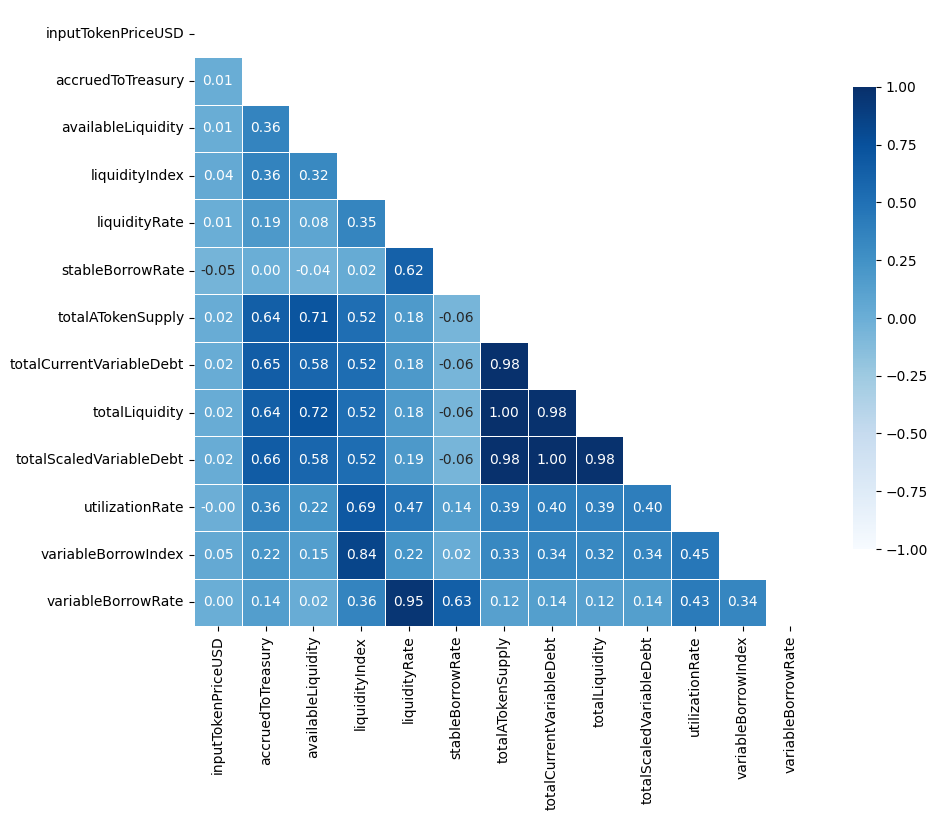

In [23]:
corr_matrix=df_num.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'shrink': 0.75})
plt.show()

In [24]:
print(df_num.columns)

Index(['inputTokenPriceUSD', 'accruedToTreasury', 'availableLiquidity',
       'liquidityIndex', 'liquidityRate', 'stableBorrowRate',
       'totalATokenSupply', 'totalCurrentVariableDebt', 'totalLiquidity',
       'totalScaledVariableDebt', 'utilizationRate', 'variableBorrowIndex',
       'variableBorrowRate'],
      dtype='object')


In [25]:
df_num['datetime']=df['datetime']
pd.DataFrame(df_num)

,inputTokenPriceUSD,accruedToTreasury,availableLiquidity,liquidityIndex,liquidityRate,stableBorrowRate,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,datetime
0,1751.42278,1.055897e-07,3.001000e+00,1.000014,0.000122,0.068676,3.042101e+00,4.110000e-02,3.042100e+00,4.110000e-02,0.013510,1.000017,0.010642,2023-01-27 08:00:00+00:00
1,1751.42278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-27 08:00:00+00:00
2,1751.42278,0.000000e+00,1.809873e-01,1.000000,0.000000,0.075000,1.809873e-01,0.000000e+00,1.809873e-01,0.000000e+00,0.000000,1.000000,0.002500,2023-01-27 08:00:00+00:00
3,1751.42278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-27 08:00:00+00:00
4,1751.42278,0.000000e+00,5.847672e-01,1.000000,0.000000,0.050000,1.584767e+00,1.000000e+00,1.584767e+00,1.000000e+00,0.631008,1.000000,0.000000,2023-01-27 08:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060218,0.99866,2.044270e-02,5.350858e+03,1.002765,0.001784,0.000000,6.056663e+03,7.035032e+02,6.022370e+03,6.887333e+02,0.111503,1.021483,0.018069,2024-12-31 23:00:00+00:00
4060219,0.99866,8.947297e+02,6.591835e+06,1.041239,0.022050,0.000000,1.004530e+07,3.451935e+06,9.765196e+06,2.917817e+06,0.324966,1.183170,0.098724,2024-12-31 23:00:00+00:00
4060220,0.99866,1.593248e+04,3.840133e+07,1.013258,0.092072,0.000000,2.177549e+08,1.793527e+08,2.144857e+08,1.755501e+08,0.820961,1.021685,0.124214,2024-12-31 23:00:00+00:00
4060221,0.99866,2.110239e+00,3.177019e+06,1.001833,0.000313,0.000000,3.347128e+06,1.678684e+05,3.343912e+06,1.653591e+05,0.049910,1.015201,0.007802,2024-12-31 23:00:00+00:00


In [31]:
data=pd.merge(df_BTC, res_BTC, left_on='datetime', right_on='regular_datetime')
cols = ['datetime'] + [col for col in df.columns if col != 'datetime']
data= data[cols]
pd.DataFrame(data)

,datetime,id,inputTokenPriceUSD,reserve_name_x,protocol_name,protocol,regular_datetime,accruedToTreasury,availableLiquidity,liquidityIndex,...,stableBorrowRate,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,reserve_name_y,reserve_pool
0,2023-01-27 12:00:00+00:00,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84c19...,22901.415798,Wrapped BTC,Aave v3,Aave,2023-01-27 12:00:00+00:00,0.000000,0.619864,1.000000,...,0.09,0.619864,0.000000,0.619864,0.000000,0.000000,1.000000,0.000000,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
1,2023-01-27 13:00:00+00:00,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84d19...,22889.291609,Wrapped BTC,Aave v3,Aave,2023-01-27 13:00:00+00:00,0.000000,0.768670,1.000000,...,0.09,0.768670,0.000000,0.768670,0.000000,0.000000,1.000000,0.000000,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
2,2023-01-27 14:00:00+00:00,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84e19...,22840.819903,Wrapped BTC,Aave v3,Aave,2023-01-27 14:00:00+00:00,0.000000,3.443268,1.000000,...,0.09,3.443268,0.000000,3.443268,0.000000,0.000000,1.000000,0.000000,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
3,2023-01-27 15:00:00+00:00,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de84f19...,22979.545483,Wrapped BTC,Aave v3,Aave,2023-01-27 15:00:00+00:00,0.000000,5.263297,1.000000,...,0.09,5.263297,0.000000,5.263297,0.000000,0.000000,1.000000,0.000000,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
4,2023-01-27 16:00:00+00:00,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de85019...,23008.788367,Wrapped BTC,Aave v3,Aave,2023-01-27 16:00:00+00:00,0.000000,5.318675,1.000000,...,0.09,5.318675,0.000000,5.318675,0.000000,0.000000,1.000000,0.000000,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14018,2024-12-31 19:00:00+00:00,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de8535b...,93759.525729,Wrapped BTC,Aave v3,Aave,2024-12-31 19:00:00+00:00,0.036288,33788.341342,1.003206,...,0.00,36595.717590,2787.966074,36511.314003,2730.518880,0.074579,1.021039,0.003809,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
14019,2024-12-31 20:00:00+00:00,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de8545b...,93759.525729,Wrapped BTC,Aave v3,Aave,2024-12-31 20:00:00+00:00,0.036469,33774.009561,1.003206,...,0.00,36592.599123,2799.180682,36508.195222,2741.500825,0.074892,1.021040,0.003825,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
14020,2024-12-31 21:00:00+00:00,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de8555b...,93271.901873,Wrapped BTC,Aave v3,Aave,2024-12-31 21:00:00+00:00,0.037136,33746.943636,1.003206,...,0.00,36583.706269,2817.354629,36499.301831,2759.298887,0.075409,1.021040,0.003823,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
14021,2024-12-31 22:00:00+00:00,0x5ee5bf7ae06d1be5997a1a72006fe6c607ec6de8565b...,93512.722731,Wrapped BTC,Aave v3,Aave,2024-12-31 22:00:00+00:00,0.038120,33746.963060,1.003206,...,0.00,36583.727180,2817.356429,36499.321755,2759.299377,0.075408,1.021041,0.003851,Wrapped BTC,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2


In [99]:
dat=pd.merge(df_ETH, res_ETH, left_on='datetime', right_on='regular_datetime')
cols = ['datetime'] + [col for col in df.columns if col != 'datetime']
dat= dat[cols]
pd.DataFrame(dat)

,datetime,id,inputTokenPriceUSD,reserve_name_x,protocol_name,protocol,regular_datetime,accruedToTreasury,availableLiquidity,liquidityIndex,...,stableBorrowRate,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,reserve_name_y,reserve_pool
0,2023-01-27 08:00:00+00:00,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e84819...,1585.870000,Wrapped Ether,Aave v3,Aave,2023-01-27 08:00:00+00:00,1.055897e-07,3.001000,1.000014,...,0.068676,3.042101e+00,4.110000e-02,3.042100e+00,4.110000e-02,0.013510,1.000017,0.010642,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
1,2023-01-27 09:00:00+00:00,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e84919...,1581.138800,Wrapped Ether,Aave v3,Aave,2023-01-27 09:00:00+00:00,1.361124e-07,3.032101,1.000014,...,0.075078,3.532101e+00,5.000001e-01,3.532100e+00,4.999910e-01,0.141559,1.000018,0.016724,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
2,2023-01-27 10:00:00+00:00,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e84a19...,1576.713700,Wrapped Ether,Aave v3,Aave,2023-01-27 10:00:00+00:00,3.003328e-07,29.550121,1.000015,...,0.068832,3.005012e+01,5.000001e-01,3.005012e+01,4.999910e-01,0.016639,1.000021,0.010790,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
3,2023-01-27 11:00:00+00:00,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e84b19...,1576.713700,Wrapped Ether,Aave v3,Aave,2023-01-27 11:00:00+00:00,3.560699e-07,33.550121,1.000015,...,0.068734,3.405012e+01,5.000001e-01,3.405012e+01,4.999910e-01,0.014684,1.000021,0.010698,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
4,2023-01-27 12:00:00+00:00,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e84c19...,1577.070038,Wrapped Ether,Aave v3,Aave,2023-01-27 12:00:00+00:00,1.847959e-06,58.780801,1.000015,...,0.079936,7.721256e+01,1.843175e+01,7.721255e+01,1.843134e+01,0.238714,1.000023,0.021339,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16664,2024-12-31 19:00:00+00:00,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e8535b...,3348.190000,Wrapped Ether,Aave v3,Aave,2024-12-31 19:00:00+00:00,3.796099e+01,248507.187675,1.037509,...,0.000000,1.739493e+06,1.489795e+06,1.709952e+06,1.405144e+06,0.854670,1.060243,0.025693,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
16665,2024-12-31 20:00:00+00:00,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e8545b...,3332.086500,Wrapped Ether,Aave v3,Aave,2024-12-31 20:00:00+00:00,3.860746e+01,248681.290258,1.037511,...,0.000000,1.739675e+06,1.489803e+06,1.710130e+06,1.405148e+06,0.854583,1.060246,0.025690,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
16666,2024-12-31 21:00:00+00:00,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e8555b...,3332.086500,Wrapped Ether,Aave v3,Aave,2024-12-31 21:00:00+00:00,3.922034e+01,248269.077157,1.037513,...,0.000000,1.739269e+06,1.489808e+06,1.709720e+06,1.405150e+06,0.854790,1.060249,0.025696,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2
16667,2024-12-31 22:00:00+00:00,0x4d5f47fa6a74757f35c14fd3a6ef8e3c9bc514e8565b...,3328.975000,Wrapped Ether,Aave v3,Aave,2024-12-31 22:00:00+00:00,3.988783e+01,251063.592586,1.037515,...,0.000000,1.742080e+06,1.489827e+06,1.712527e+06,1.405162e+06,0.853396,1.060253,0.025655,Wrapped Ether,0x87870bca3f3fd6335c3f4ce8392d69350b4fa4e2


In [33]:

data_num = data.select_dtypes(include=['number'])
data_num['datetime']=data['datetime']
pd.DataFrame(data_num)


,inputTokenPriceUSD,accruedToTreasury,availableLiquidity,liquidityIndex,liquidityRate,stableBorrowRate,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,datetime
0,22901.415798,0.000000,0.619864,1.000000,0.000000,0.09,0.619864,0.000000,0.619864,0.000000,0.000000,1.000000,0.000000,2023-01-27 12:00:00+00:00
1,22889.291609,0.000000,0.768670,1.000000,0.000000,0.09,0.768670,0.000000,0.768670,0.000000,0.000000,1.000000,0.000000,2023-01-27 13:00:00+00:00
2,22840.819903,0.000000,3.443268,1.000000,0.000000,0.09,3.443268,0.000000,3.443268,0.000000,0.000000,1.000000,0.000000,2023-01-27 14:00:00+00:00
3,22979.545483,0.000000,5.263297,1.000000,0.000000,0.09,5.263297,0.000000,5.263297,0.000000,0.000000,1.000000,0.000000,2023-01-27 15:00:00+00:00
4,23008.788367,0.000000,5.318675,1.000000,0.000000,0.09,5.318675,0.000000,5.318675,0.000000,0.000000,1.000000,0.000000,2023-01-27 16:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14018,93759.525729,0.036288,33788.341342,1.003206,0.000145,0.00,36595.717590,2787.966074,36511.314003,2730.518880,0.074579,1.021039,0.003809,2024-12-31 19:00:00+00:00
14019,93759.525729,0.036469,33774.009561,1.003206,0.000146,0.00,36592.599123,2799.180682,36508.195222,2741.500825,0.074892,1.021040,0.003825,2024-12-31 20:00:00+00:00
14020,93271.901873,0.037136,33746.943636,1.003206,0.000146,0.00,36583.706269,2817.354629,36499.301831,2759.298887,0.075409,1.021040,0.003823,2024-12-31 21:00:00+00:00
14021,93512.722731,0.038120,33746.963060,1.003206,0.000148,0.00,36583.727180,2817.356429,36499.321755,2759.299377,0.075408,1.021041,0.003851,2024-12-31 22:00:00+00:00


In [100]:
dat_num = dat.select_dtypes(include=['number'])
dat_num['datetime']=dat['datetime']
pd.DataFrame(dat_num)

,inputTokenPriceUSD,accruedToTreasury,availableLiquidity,liquidityIndex,liquidityRate,stableBorrowRate,totalATokenSupply,totalCurrentVariableDebt,totalLiquidity,totalScaledVariableDebt,utilizationRate,variableBorrowIndex,variableBorrowRate,datetime
0,1585.870000,1.055897e-07,3.001000,1.000014,0.000122,0.068676,3.042101e+00,4.110000e-02,3.042100e+00,4.110000e-02,0.013510,1.000017,0.010642,2023-01-27 08:00:00+00:00
1,1581.138800,1.361124e-07,3.032101,1.000014,0.002012,0.075078,3.532101e+00,5.000001e-01,3.532100e+00,4.999910e-01,0.141559,1.000018,0.016724,2023-01-27 09:00:00+00:00
2,1576.713700,3.003328e-07,29.550121,1.000015,0.000153,0.068832,3.005012e+01,5.000001e-01,3.005012e+01,4.999910e-01,0.016639,1.000021,0.010790,2023-01-27 10:00:00+00:00
3,1576.713700,3.560699e-07,33.550121,1.000015,0.000134,0.068734,3.405012e+01,5.000001e-01,3.405012e+01,4.999910e-01,0.014684,1.000021,0.010698,2023-01-27 11:00:00+00:00
4,1577.070038,1.847959e-06,58.780801,1.000015,0.004330,0.079936,7.721256e+01,1.843175e+01,7.721255e+01,1.843134e+01,0.238714,1.000023,0.021339,2023-01-27 12:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16664,3348.190000,3.796099e+01,248507.187675,1.037509,0.018703,0.000000,1.739493e+06,1.489795e+06,1.709952e+06,1.405144e+06,0.854670,1.060243,0.025693,2024-12-31 19:00:00+00:00
16665,3332.086500,3.860746e+01,248681.290258,1.037511,0.018700,0.000000,1.739675e+06,1.489803e+06,1.710130e+06,1.405148e+06,0.854583,1.060246,0.025690,2024-12-31 20:00:00+00:00
16666,3332.086500,3.922034e+01,248269.077157,1.037513,0.018709,0.000000,1.739269e+06,1.489808e+06,1.709720e+06,1.405150e+06,0.854790,1.060249,0.025696,2024-12-31 21:00:00+00:00
16667,3328.975000,3.988783e+01,251063.592586,1.037515,0.018649,0.000000,1.742080e+06,1.489827e+06,1.712527e+06,1.405162e+06,0.853396,1.060253,0.025655,2024-12-31 22:00:00+00:00


In [60]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, alpha=0.05):
    # ADF Test
    adf_result = adfuller(series)
    p_value_adf = adf_result[1]
    print(f"ADF p-value: {p_value_adf}")
    if p_value_adf <= alpha:
        print("ADF: Reject Null (Stationary)")
    else:
        print("ADF: Fail to Reject Null (Non-Stationary)")




In [68]:
check_stationarity(data_num['inputTokenPriceUSD'])
exog_vars = ['totalATokenSupply', 'totalLiquidity', 'availableLiquidity' ]
for var in exog_vars:
    check_stationarity(data_num[var])


ADF p-value: 0.939780748722051
ADF: Fail to Reject Null (Non-Stationary)
ADF p-value: 0.4054447660014054
ADF: Fail to Reject Null (Non-Stationary)
ADF p-value: 0.40380075587973085
ADF: Fail to Reject Null (Non-Stationary)
ADF p-value: 0.6094764506296854
ADF: Fail to Reject Null (Non-Stationary)


In [58]:
data_num['BTC_Returns'] = data_num['inputTokenPriceUSD'].pct_change().dropna()
data_num['totalATokenSupplyReturns'] = data_num['totalATokenSupply'].pct_change().dropna()
data_num['totalLiquidityReturns'] = data_num['totalLiquidity'].pct_change().dropna()
data_num['availableLiquidityReturns'] = data_num['availableLiquidity'].pct_change().dropna()
print("NaN count:", data_num['BTC_Returns'].isna().sum())
print("NaN count:", data_num['totalATokenSupplyReturns'].isna().sum())
print("NaN count:", data_num['totalLiquidityReturns'].isna().sum())
print("NaN count:", data_num['availableLiquidityReturns'].isna().sum())



NaN count: 1
NaN count: 1
NaN count: 1
NaN count: 1


In [53]:
clean = data_num.dropna(subset=['BTC_Returns']).copy()
clean = clean.dropna(subset=['totalATokenSupplyReturns']).copy()
clean = clean.dropna(subset=['totalLiquidityReturns']).copy()
clean = clean.dropna(subset=['availableLiquidityReturns']).copy()
print("NaN count:", clean['BTC_Returns'].isna().sum())
print("NaN count:", clean['totalATokenSupplyReturns'].isna().sum())
print("NaN count:", clean['totalLiquidityReturns'].isna().sum())
print("NaN count:", clean['availableLiquidityReturns'].isna().sum())

NaN count: 0
NaN count: 0
NaN count: 0
NaN count: 0


In [69]:
check_stationarity(clean['BTC_Returns'])
exog_returns = ['totalATokenSupplyReturns', 'totalLiquidityReturns', 'availableLiquidityReturns' ]
for var in exog_returns:
    check_stationarity(clean[var])


ADF p-value: 0.0
ADF: Reject Null (Stationary)
ADF p-value: 3.6961012798963544e-30
ADF: Reject Null (Stationary)
ADF p-value: 3.696144647101983e-30
ADF: Reject Null (Stationary)
ADF p-value: 8.250632213397401e-30
ADF: Reject Null (Stationary)


*Automated lag selection*

In [73]:
clean['log_BTC']=np.log(clean['inputTokenPriceUSD'])
clean['log_totalATokenSupply'] = np.log(clean['totalATokenSupply'])
clean['log_totalLiquidity'] = np.log(clean['totalLiquidity'])
clean['log_availableLiquidity'] = np.log(clean['availableLiquidity'])
log_var=['log_totalATokenSupply', 'log_totalLiquidity', 'log_availableLiquidity' ]

In [79]:
from statsmodels.tsa.ardl import ardl_select_order
max_p = 12  # Max lags for BTC
max_q = 6  # Max lags for exogenous vars
y=clean['log_BTC']

result = ardl_select_order(
    endog=y,
    exog=clean[exog_vars],
    maxlag=max_p,                  # Max lags for y (p)
    maxorder=max_q,                # Max lags for x (q)
    ic='aic'                   # or 'aic'
)

optimal_lags = result.model.ardl_order  
p = optimal_lags[0]                     # Lag for BTC returns
qs = optimal_lags[1:]                   # Lags for each exogenous variable (in exog_vars order)

print(f"Optimal p: {p}, Optimal q's: {qs}")



c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Optimal p: 1, Optimal q's: (5, 5)


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [90]:
from statsmodels.tsa.ardl import ARDL
model = ARDL(
    endog=y,
    exog=clean[exog_vars],
    lags=1,
    order=5,  # List of lags matching exog_vars order
    trend='c',
).fit(cov_type='HC0')  # Robust standard errors

# 4. Display results
print(model.summary())

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                              ARDL Model Results                              
Dep. Variable:                log_BTC   No. Observations:                14022
Model:               ARDL(1, 5, 5, 5)   Log Likelihood               52545.822
Method:               Conditional MLE   S.D. of innovations              0.006
Date:                Wed, 16 Apr 2025   AIC                        -105049.644
Time:                        18:55:33   BIC                        -104891.129
Sample:                             5   HQIC                       -104996.876
                                14022                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0083      0.004      2.262      0.024       0.001       0.016
log_BTC.L1                0.9992      0.000   2728.204      0.000       0.998       1.000
totalATo

In [96]:

def enhanced_ardl_summary(mod):
    """Generate a more readable ARDL summary"""
    from IPython.display import display, HTML
    
    # Base summary
    summary = mod.summary().tables[1].as_html()
    display(HTML(f"""
    <h3>Enhanced ARDL Results</h3>
    {summary}"""))

enhanced_ardl_summary(model)

,coef,std err,z,P>|z|,[0.025,0.975]
const,0.0083,0.004,2.262,0.024,0.001,0.016
log_BTC.L1,0.9992,0.000,2728.204,0.000,0.998,1.000
totalATokenSupply.L0,-0.0003,0.000,-1.372,0.170,-0.001,0.000
totalATokenSupply.L1,0.0004,0.000,1.556,0.120,-0.000,0.001
totalATokenSupply.L2,-4.19e-06,0.000,-0.022,0.982,-0.000,0.000
totalATokenSupply.L3,0.0002,0.000,1.695,0.090,-2.97e-05,0.000
totalATokenSupply.L4,-0.0004,0.000,-2.347,0.019,-0.001,-6.25e-05
totalATokenSupply.L5,6.785e-05,0.000,0.428,0.668,-0.000,0.000
totalLiquidity.L0,0.0003,0.000,1.395,0.163,-0.000,0.001
totalLiquidity.L1,-0.0004,0.000,-1.586,0.113,-0.001,9.95e-05


In [101]:
check_stationarity(dat_num['inputTokenPriceUSD'])
check_stationarity(dat_num['variableBorrowRate'])


ADF p-value: 0.5687428583229623
ADF: Fail to Reject Null (Non-Stationary)
ADF p-value: 0.00024480267538607944
ADF: Reject Null (Stationary)


In [103]:
dat_num['ETH_Returns'] = dat_num['inputTokenPriceUSD'].pct_change().dropna()
cl = dat_num.dropna(subset=['ETH_Returns']).copy()
check_stationarity(cl['ETH_Returns'])


ADF p-value: 0.0
ADF: Reject Null (Stationary)


In [106]:
cl['log_ETH']=np.log(cl['inputTokenPriceUSD'])
max_p = 12  # Max lags for BTC
max_q = 6  # Max lags for exogenous vars
y=cl['log_ETH']

result = ardl_select_order(
    endog=y,
    exog=cl[['variableBorrowRate']],
    maxlag=max_p,                  # Max lags for y (p)
    maxorder=max_q,                # Max lags for x (q)
    ic='aic'                   # or 'bic'
)

optimal_lags = result.model.ardl_order  
p = optimal_lags[0]                     # Lag for BTC returns
qs = optimal_lags[1:]                   # Lags for each exogenous variable (in exog_vars order)

print(f"Optimal p: {p}, Optimal q's: {qs}")

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Optimal p: 1, Optimal q's: (6,)


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [107]:
model = ARDL(
    endog=y,
    exog=cl[['variableBorrowRate']],
    lags=1,
    order=6,  # List of lags matching exog_vars order
    trend='c',
).fit(cov_type='HC0')  # Robust standard errors

# 4. Display results
print(model.summary())

                              ARDL Model Results                              
Dep. Variable:                log_ETH   No. Observations:                16668
Model:                     ARDL(1, 6)   Log Likelihood               61441.286
Method:               Conditional MLE   S.D. of innovations              0.006
Date:                Thu, 17 Apr 2025   AIC                        -122862.572
Time:                        01:23:21   BIC                        -122785.361
Sample:                             6   HQIC                       -122837.086
                                16668                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0055      0.002      2.513      0.012       0.001       0.010
log_ETH.L1                0.9994      0.000   4065.321      0.000       0.999       1.000
variable

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
